In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
from keras.preprocessing import image
import keras.backend as K
import os
import glob
import numpy as np

Using TensorFlow backend.


In [2]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
def limit_men():
    cfg = K.tf.ConfigProto()
    cfg.gpu_options.allow_growth = True
    K.set_session(K.tf.Session(config=cfg))

In [3]:
limit_men() # 启动命令，禁⽌tensorflow占满内存

In [4]:
path = '/home/ubuntu/dataset/dogs_cats_sample/'
gen_path = '/home/ubuntu/dataset/dogs_cats_gen/'

In [7]:
def print_result(path):
    name_list = glob.glob(path)
    fig = plt.figure()
    for i in range(9):
        img = Image.open(name_list[i])
        sub_img = fig.add_subplot(331 + i)
        sub_img.imshow(img)
    plt.show()
    
    return fig

In [12]:
name_list = glob.glob(path+'*/*')
name_list

['/home/ubuntu/dataset/dogs_cats_sample/dogs/dog.1052.jpg',
 '/home/ubuntu/dataset/dogs_cats_sample/dogs/dog.1045.jpg',
 '/home/ubuntu/dataset/dogs_cats_sample/dogs/dog.1053.jpg',
 '/home/ubuntu/dataset/dogs_cats_sample/dogs/dog.1048.jpg',
 '/home/ubuntu/dataset/dogs_cats_sample/dogs/dog.1044.jpg',
 '/home/ubuntu/dataset/dogs_cats_sample/dogs/dog.1046.jpg',
 '/home/ubuntu/dataset/dogs_cats_sample/dogs/dog.1050.jpg',
 '/home/ubuntu/dataset/dogs_cats_sample/dogs/dog.1049.jpg',
 '/home/ubuntu/dataset/dogs_cats_sample/dogs/dog.1051.jpg',
 '/home/ubuntu/dataset/dogs_cats_sample/dogs/dog.1047.jpg']

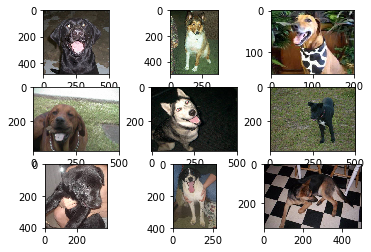

In [8]:
fig = print_result(path+'*/*')

In [7]:
fig.savefig(gen_path+'figs/origin.png', dpi=200, papertype='a5')

## 原图

In [143]:
datagen = image.ImageDataGenerator()

In [144]:
gen_data = datagen.flow_from_directory(path, batch_size=1, shuffle=False, 
                                       save_to_dir=gen_path+'18',
                                  save_prefix='gen', target_size=(224, 224))

Found 10 images belonging to 1 classes.


In [145]:
for i in range(9):
    gen_data.next()

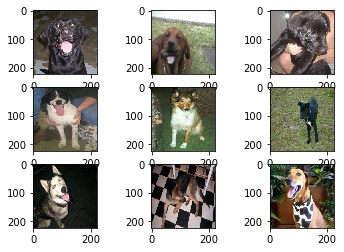

In [146]:
fig = print_result(gen_path+'18/*')

In [147]:
fig.savefig(gen_path+'18/original.png', dpi=200, papertype='a5')

## featurewise

In [57]:
del data

In [58]:
datagen = image.ImageDataGenerator(featurewise_center=True,
    featurewise_std_normalization=True)

In [59]:
gen = image.ImageDataGenerator()

In [60]:
data = gen.flow_from_directory(path, batch_size=1, class_mode=None, shuffle=True, target_size=(224, 224))

Found 10 images belonging to 1 classes.


In [61]:
np_data = np.concatenate([data.next() for i in range(data.n)])

In [62]:
datagen.fit(np_data)

In [63]:
gen_data = datagen.flow_from_directory(path, batch_size=1, shuffle=False, save_to_dir=gen_path+'1',
                                  save_prefix='gen', target_size=(224, 224))

Found 10 images belonging to 1 classes.


In [64]:
for i in range(9):
    gen_data.next()

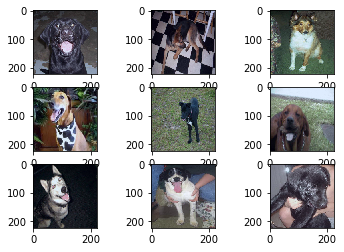

In [68]:
fig = print_result(gen_path+'1/*')

In [75]:
fig.savefig(gen_path+'figs/featurewise.png', dpi=200, papertype='a5')

## sample_wise

In [104]:
del np_data, gen_data

In [26]:
datagen = image.ImageDataGenerator(samplewise_center=True,
    samplewise_std_normalization=True)

In [77]:
gen = image.ImageDataGenerator()

In [78]:
data = gen.flow_from_directory(path, batch_size=1, class_mode=None, shuffle=True, target_size=(224, 224))

Found 10 images belonging to 1 classes.


In [79]:
np_data = np.concatenate([data.next() for i in range(data.n)])

In [80]:
datagen.fit(np_data)

In [27]:
gen_data = datagen.flow_from_directory(path, batch_size=1, shuffle=False, save_to_dir=gen_path+'2',
                                  save_prefix='gen', target_size=(224, 224))

Found 10 images belonging to 1 classes.


In [30]:
for i in range(9):
    gen_data.next()

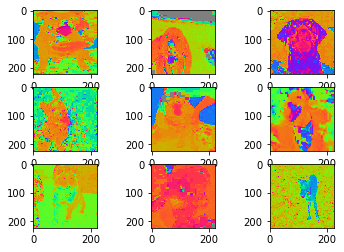

In [31]:
fig = print_result(gen_path+'2/*')

In [32]:
fig.savefig(gen_path+'2/sample_wise.png', dpi=200, papertype='a5')

## zca_whitening

In [50]:
del np_data

In [6]:
datagen = image.ImageDataGenerator(zca_whitening=True)

In [7]:
gen = image.ImageDataGenerator()

In [8]:
data = gen.flow_from_directory(path, batch_size=1, class_mode=None, shuffle=True, target_size=(28, 28))

Found 10 images belonging to 1 classes.


In [9]:
np_data = np.concatenate([data.next().astype('float32') for i in range(1)]) 

In [ ]:
%time datagen.fit(np_data)

In [97]:
gen_data = datagen.flow_from_directory(path, batch_size=1, shuffle=False, save_to_dir=gen_path+'3',
                                  save_prefix='gen', target_size=(224, 224))

Found 10 images belonging to 1 classes.


In [98]:
for i in range(9):
    gen_data.next()

/home/ubuntu/anaconda3/envs/gputest/lib/python3.5/site-packages/keras/preprocessing/image.py:523: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
fig = print_result(gen_path+'2/*')

In [94]:
fig.savefig(gen_path+'2/sample_wise.png', dpi=200, papertype='a5')

## rotation range

In [21]:
datagen = image.ImageDataGenerator(rotation_range=30)

In [22]:
gen_data = datagen.flow_from_directory(path, batch_size=1, shuffle=False, save_to_dir=gen_path+'3',
                                  save_prefix='gen', target_size=(224, 224))

Found 10 images belonging to 1 classes.


In [23]:
for i in range(9):
    gen_data.next()

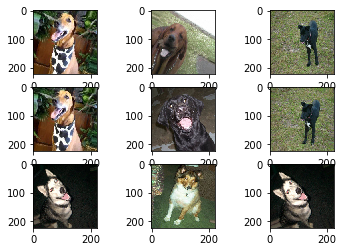

In [24]:
fig = print_result(gen_path+'3/*')

In [25]:
fig.savefig(gen_path+'3/rotation.png', dpi=200, papertype='a5')

## width_shift_range & height_shift_range

In [16]:
datagen = image.ImageDataGenerator(width_shift_range=0.5,height_shift_range=0.5)

In [17]:
gen_data = datagen.flow_from_directory(path, batch_size=1, shuffle=False, save_to_dir=gen_path+'4',
                                  save_prefix='gen', target_size=(224, 224))

Found 10 images belonging to 1 classes.


In [18]:
for i in range(9):
    gen_data.next()

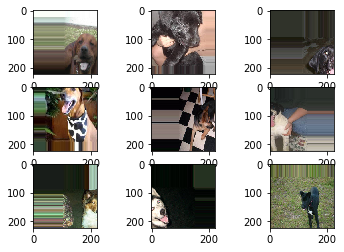

In [19]:
fig = print_result(gen_path+'4/*')

In [20]:
fig.savefig(gen_path+'4/sample_wise.png', dpi=200, papertype='a5')

In [45]:
datagen = image.ImageDataGenerator(width_shift_range=1.,height_shift_range=1.)

In [46]:
gen_data = datagen.flow_from_directory(path, batch_size=1, shuffle=False, save_to_dir=gen_path+'5',
                                  save_prefix='gen', target_size=(224, 224))

Found 10 images belonging to 1 classes.


In [47]:
for i in range(9):
    gen_data.next()

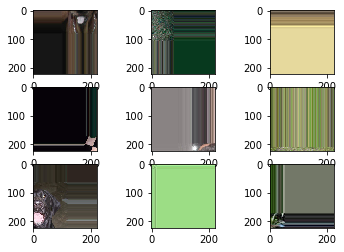

In [48]:
fig = print_result(gen_path+'5/*')

In [49]:
fig.savefig(gen_path+'5/width_height_shift.png', dpi=200, papertype='a5')

## shear_range

In [60]:
datagen = image.ImageDataGenerator(shear_range=0.5)

In [51]:
gen_data = datagen.flow_from_directory(path, batch_size=1, shuffle=False, 
                                       save_to_dir=gen_path+'6',
                                  save_prefix='gen', target_size=(224, 224))

Found 10 images belonging to 1 classes.


In [52]:
for i in range(9):
    gen_data.next()

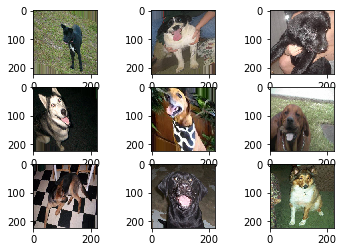

In [53]:
fig = print_result(gen_path+'6/*')

In [54]:
fig.savefig(gen_path+'6/shear_range.png', dpi=200, papertype='a5')

In [55]:
datagen = image.ImageDataGenerator(shear_range=10)

In [56]:
gen_data = datagen.flow_from_directory(path, batch_size=1, shuffle=False, 
                                       save_to_dir=gen_path+'7',
                                  save_prefix='gen', target_size=(224, 224))

Found 10 images belonging to 1 classes.


In [57]:
for i in range(9):
    gen_data.next()

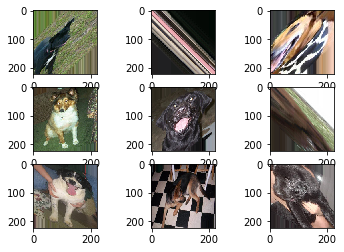

In [58]:
fig = print_result(gen_path+'7/*')

In [59]:
fig.savefig(gen_path+'7/shear_range.png', dpi=200, papertype='a5')

## zoom_range

In [61]:
datagen = image.ImageDataGenerator(zoom_range=0.5)

In [62]:
gen_data = datagen.flow_from_directory(path, batch_size=1, shuffle=False, save_to_dir=gen_path+'8',
                                  save_prefix='gen', target_size=(224, 224))

Found 10 images belonging to 1 classes.


In [63]:
for i in range(9):
    gen_data.next()

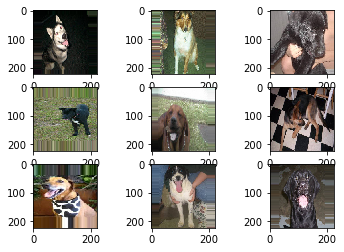

In [64]:
fig = print_result(gen_path+'8/*')

In [65]:
fig.savefig(gen_path+'8/sample_wise.png', dpi=200, papertype='a5')

In [66]:
datagen = image.ImageDataGenerator(zoom_range=4)

In [67]:
gen_data = datagen.flow_from_directory(path, batch_size=1, shuffle=False, 
                                       save_to_dir=gen_path+'9',
                                  save_prefix='gen', target_size=(224, 224))

Found 10 images belonging to 1 classes.


In [68]:
for i in range(9):
    gen_data.next()

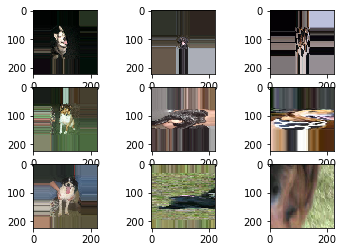

In [69]:
fig = print_result(gen_path+'9/*')

In [70]:
fig.savefig(gen_path+'9/sample_wise.png', dpi=200, papertype='a5')

In [71]:
datagen = image.ImageDataGenerator(zoom_range=[0.5, 4])

In [72]:
gen_data = datagen.flow_from_directory(path, batch_size=1, shuffle=False, 
                                       save_to_dir=gen_path+'10',
                                  save_prefix='gen', target_size=(224, 224))

Found 10 images belonging to 1 classes.


In [73]:
for i in range(9):
    gen_data.next()

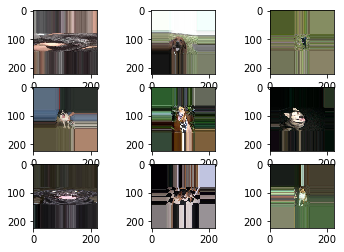

In [74]:
fig = print_result(gen_path+'10/*')

In [75]:
fig.savefig(gen_path+'10/sample_wise.png', dpi=200, papertype='a5')

## channel_shift_range

In [76]:
datagen = image.ImageDataGenerator(channel_shift_range=10)

In [77]:
gen_data = datagen.flow_from_directory(path, batch_size=1, shuffle=False, 
                                       save_to_dir=gen_path+'11',
                                  save_prefix='gen', target_size=(224, 224))

Found 10 images belonging to 1 classes.


In [78]:
for i in range(9):
    gen_data.next()

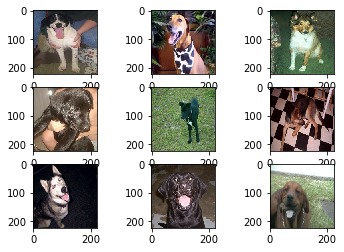

In [79]:
fig = print_result(gen_path+'11/*')

In [80]:
fig.savefig(gen_path+'11/sample_wise.png', dpi=200, papertype='a5')

In [81]:
datagen = image.ImageDataGenerator(channel_shift_range=100)

In [82]:
gen_data = datagen.flow_from_directory(path, batch_size=1, shuffle=False, 
                                       save_to_dir=gen_path+'12',
                                  save_prefix='gen', target_size=(224, 224))

Found 10 images belonging to 1 classes.


In [83]:
for i in range(9):
    gen_data.next()

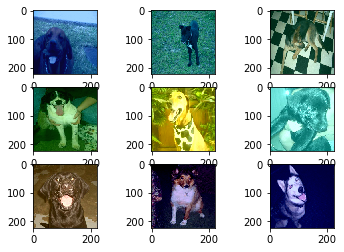

In [84]:
fig = print_result(gen_path+'12/*')

In [85]:
fig.savefig(gen_path+'12/sample_wise.png', dpi=200, papertype='a5')

## horizontal_flip

In [90]:
datagen = image.ImageDataGenerator(horizontal_flip=True)

In [91]:
gen_data = datagen.flow_from_directory(path, batch_size=1, shuffle=False, 
                                       save_to_dir=gen_path+'13',
                                  save_prefix='gen', target_size=(224, 224))

Found 10 images belonging to 1 classes.


In [96]:
for i in range(9):
    gen_data.next()

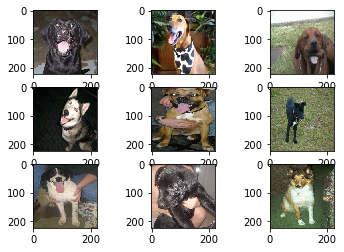

In [97]:
fig = print_result(gen_path+'13/*')

In [98]:
fig.savefig(gen_path+'13/horizontal_flip.png', dpi=200, papertype='a5')

## vertical_flip

In [99]:
datagen = image.ImageDataGenerator(vertical_flip=True)

In [100]:
gen_data = datagen.flow_from_directory(path, batch_size=1, shuffle=False, 
                                       save_to_dir=gen_path+'14',
                                  save_prefix='gen', target_size=(224, 224))

Found 10 images belonging to 1 classes.


In [101]:
for i in range(9):
    gen_data.next()

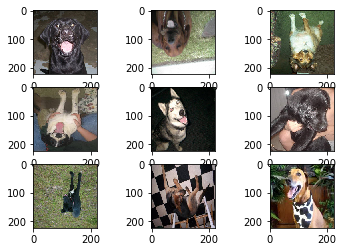

In [102]:
fig = print_result(gen_path+'14/*')

In [103]:
fig.savefig(gen_path+'14/vertical_flip.png', dpi=200, papertype='a5')

## rescale

In [116]:
datagen = image.ImageDataGenerator(rescale= 1/255, width_shift_range=0.1)

In [117]:
gen_data = datagen.flow_from_directory(path, batch_size=1, shuffle=False, 
                                       save_to_dir=gen_path+'15',
                                  save_prefix='gen', target_size=(224, 224))

Found 10 images belonging to 1 classes.


In [118]:
for i in range(9):
    gen_data.next()

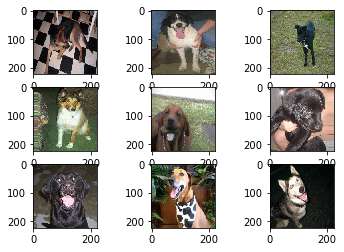

In [119]:
fig = print_result(gen_path+'15/*')

In [121]:
img = gen_data.next()
img

(array([[[[ 0.71764708,  0.73725492,  0.71372551],
          [ 0.71764708,  0.73725492,  0.71372551],
          [ 0.71764708,  0.73725492,  0.71372551],
          ..., 
          [ 0.19607845,  0.20784315,  0.17254902],
          [ 0.21176472,  0.22352943,  0.18823531],
          [ 0.20784315,  0.21960786,  0.18431373]],
 
         [[ 0.72549021,  0.74509805,  0.72156864],
          [ 0.72549021,  0.74509805,  0.72156864],
          [ 0.72549021,  0.74509805,  0.72156864],
          ..., 
          [ 0.21176472,  0.23529413,  0.19607845],
          [ 0.22352943,  0.24705884,  0.20784315],
          [ 0.2392157 ,  0.26274511,  0.22352943]],
 
         [[ 0.69411767,  0.71372551,  0.6901961 ],
          [ 0.69411767,  0.71372551,  0.6901961 ],
          [ 0.69411767,  0.71372551,  0.6901961 ],
          ..., 
          [ 0.21176472,  0.25098041,  0.21568629],
          [ 0.21568629,  0.25490198,  0.21960786],
          [ 0.23137257,  0.27058825,  0.23529413]],
 
         ..., 
         [

In [120]:
img = Image.open(gen_path+'15/gen_1_1409.png')
img_arr = np.array(img)
img_arr

array([[[ 24,  29,  25],
        [ 24,  29,  25],
        [ 24,  29,  25],
        ..., 
        [ 75,  58,  38],
        [ 72,  55,  35],
        [ 64,  55,  40]],

       [[ 26,  31,  25],
        [ 26,  31,  25],
        [ 26,  31,  25],
        ..., 
        [ 75,  60,  39],
        [ 65,  50,  29],
        [ 58,  47,  29]],

       [[ 30,  35,  29],
        [ 30,  35,  29],
        [ 30,  35,  29],
        ..., 
        [ 63,  50,  31],
        [ 58,  45,  26],
        [ 67,  52,  31]],

       ..., 
       [[118, 117,  53],
        [118, 117,  53],
        [118, 117,  53],
        ..., 
        [ 79, 104,  72],
        [ 66,  91,  59],
        [ 66,  93,  52]],

       [[122, 125,  98],
        [122, 125,  98],
        [122, 125,  98],
        ..., 
        [ 56,  88,  49],
        [ 64,  94,  58],
        [ 74, 106,  67]],

       [[131, 134, 107],
        [131, 134, 107],
        [131, 134, 107],
        ..., 
        [ 69, 101,  62],
        [ 71, 101,  65],
        [ 58,  90,

In [115]:
fig.savefig(gen_path+'15/rescale.png', dpi=200, papertype='a5')

## fill_mode

In [148]:
datagen = image.ImageDataGenerator(fill_mode='wrap', zoom_range=[4, 4])

In [149]:
gen_data = datagen.flow_from_directory(path, batch_size=1, shuffle=False, 
                                       save_to_dir=gen_path+'16',
                                  save_prefix='gen', target_size=(224, 224))

Found 10 images belonging to 1 classes.


In [150]:
for i in range(1):
    gen_data.next()

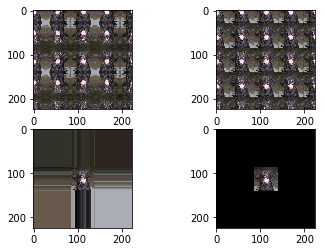

In [135]:
name_list = glob.glob(gen_path+'16/*')
fig = plt.figure()
for i in range(4):
    img = Image.open(name_list[i])
    sub_img = fig.add_subplot(221 + i)
    sub_img.imshow(img)
plt.show()

In [136]:
fig.savefig(gen_path+'16/fill_mode.png', dpi=200, papertype='a5')

In [140]:
datagen = image.ImageDataGenerator(fill_mode='constant', cval=100, zoom_range=[4, 4])

In [141]:
gen_data = datagen.flow_from_directory(path, batch_size=1, shuffle=False, 
                                       save_to_dir=gen_path+'16',
                                  save_prefix='gen', target_size=(224, 224))

Found 10 images belonging to 1 classes.


In [142]:
for i in range(1):
    gen_data.next()